In [ ]:

#%% load package and data
from sklearn import tree
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('Mushroom.csv', delimiter=",")

train = data[0:6000]
test = data[6000:8124]

#%% random forest

n_tree = 100
n_feat = 5
n_obs = 800
np.random.seed(5525)

prob_table = np.zeros((2124, n_tree))

for i in range(n_tree):
    obs_index = np.random.choice(len(train), n_obs, replace = True)
    feat_index = np.random.choice(range(1, train.shape[1]), n_feat, replace = False)
    X = train[obs_index]
    X = X[:, feat_index]
    Y = train[obs_index, 0]
    X_test = test[:, feat_index]
    Y_test = test[:, 0]
    clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
    clf = clf.fit(X, Y)
    t = clf.predict_proba(X_test)
    prob_table[:, i] = t[:, 0]
pred_prob = prob_table.mean(1)
pred_result = np.where(pred_prob > 0.5, -1, 1)
acc_rate = sum(np.where(pred_result == Y_test, 1, 0))/len(test)

#%% different feature sets
np.random.seed(5525)
feat_list = [5, 10, 15, 20]
n_tree = 100
n_obs = 800

train_acc_list = []
test_acc_list = []

for n_feat in feat_list:
    
    train_prob_table = np.zeros((len(train), n_tree))
    test_prob_table = np.zeros((len(test), n_tree))
    
    for i in range(n_tree):
        obs_index = np.random.choice(len(train), n_obs, replace = True)
        feat_index = np.random.choice(range(1, train.shape[1]), n_feat, replace = False)
        X = train[obs_index]
        X = X[:, feat_index]
        Y = train[obs_index, 0]
        X_test = test[:, feat_index]
        Y_test = test[:, 0]
        clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
        clf = clf.fit(X, Y)
        t = clf.predict_proba(train[:, feat_index])
        train_prob_table[:, i] = t[:, 0]
        t = clf.predict_proba(X_test)
        test_prob_table[:, i] = t[:, 0]
        
    train_pred_prob = train_prob_table.mean(1)
    train_pred_result = np.where(train_pred_prob > 0.5, -1, 1)
    train_acc_rate = sum(np.where(train_pred_result == train[:, 0], 1, 0))/len(train)
    train_acc_list.append(train_acc_rate)
    test_pred_prob = test_prob_table.mean(1)
    test_pred_result = np.where(test_pred_prob > 0.5, -1, 1)
    test_acc_rate = sum(np.where(test_pred_result == test[:, 0], 1, 0))/len(test)
    test_acc_list.append(test_acc_rate)

plt.figure(figsize=(16,10))
plt.plot(train_acc_list, marker='', linewidth = 2, linestyle='--', label = 'Train Acc')
plt.plot(test_acc_list, marker='', linewidth = 2, linestyle='--', label = 'Test Acc')
plt.legend(fontsize=20)
plt.xlabel('Size', fontsize=20)
plt.ylabel('Acc', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks([0,1,2,3], feat_list, fontsize=20)

#%% different number of trees
np.random.seed(5525)
n_feat = 20
tree_list = [10, 20, 40, 80, 100]
n_obs = 800

train_acc_list = []
test_acc_list = []

for n_tree in tree_list:
    
    train_prob_table = np.zeros((len(train), n_tree))
    test_prob_table = np.zeros((len(test), n_tree))
    
    for i in range(n_tree):
        obs_index = np.random.choice(len(train), n_obs, replace = True)
        feat_index = np.random.choice(range(1, train.shape[1]), n_feat, replace = False)
        X = train[obs_index]
        X = X[:, feat_index]
        Y = train[obs_index, 0]
        X_test = test[:, feat_index]
        Y_test = test[:, 0]
        clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
        clf = clf.fit(X, Y)
        t = clf.predict_proba(train[:, feat_index])
        train_prob_table[:, i] = t[:, 0]
        t = clf.predict_proba(X_test)
        test_prob_table[:, i] = t[:, 0]
        
    train_pred_prob = train_prob_table.mean(1)
    train_pred_result = np.where(train_pred_prob > 0.5, -1, 1)
    train_acc_rate = sum(np.where(train_pred_result == train[:, 0], 1, 0))/len(train)
    train_acc_list.append(train_acc_rate)
    test_pred_prob = test_prob_table.mean(1)
    test_pred_result = np.where(test_pred_prob > 0.5, -1, 1)
    test_acc_rate = sum(np.where(test_pred_result == test[:, 0], 1, 0))/len(test)
    test_acc_list.append(test_acc_rate)

plt.figure(figsize=(16,10))
plt.plot(train_acc_list, marker='', linewidth = 2, linestyle='--', label = 'Train Acc')
plt.plot(test_acc_list, marker='', linewidth = 2, linestyle='--', label = 'Test Acc')
plt.legend(fontsize=20)
plt.xlabel('Size', fontsize=20)
plt.ylabel('Acc', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks([0,1,2,3,4], tree_list, fontsize=20)


In [1]:
from sklearn import tree
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mush_data = np.loadtxt('Mushroom.csv', delimiter=",")
mush_train = mush_data[:6000]
mush_test = mush_data[6000:]
mush_train_X = mush_train[:,1:]
mush_train_Y = mush_train[:,0]
mush_test_X = mush_test[:,1:]
mush_test_Y = mush_test[:,0]

In [3]:
mush_train_X.shape

(6000, 22)

In [43]:
def build_rf(training_X,training_Y,testing_X,testing_Y,num_tree =100, num_feature = 5,sample_ratio = 1/10,criterion = 'gini', max_depth = 2):
    prediction_training = np.zeros((training_Y.size, num_tree))
    prediction_testing = np.zeros((testing_Y.size, num_tree))
    sample_size = int(np.floor(sample_ratio * training_X.shape[0]))
    model_list = []
    for i in range(num_tree):
        sample_index = np.random.choice(training_X.shape[0], sample_size, replace = True)
        feature_index = np.random.choice(training_X.shape[1], num_feature, replace = False)
        tree_training_X = training_X[sample_index][:,feature_index]
        tree_training_Y = training_Y[sample_index]
        tree_testing_X = testing_X[:,feature_index]
        tree_model = tree.DecisionTreeClassifier(criterion = criterion, max_depth = max_depth)
        tree_model = tree_model.fit(tree_training_X, tree_training_Y)
        model_list.append(tree_model)
        train_pred = tree_model.predict_proba(training_X[:, feature_index])
        prediction_training[:,i] = train_pred[:,0]
        test_pred = tree_model.predict_proba(tree_testing_X)
        prediction_testing[:,i] = test_pred[:,0]
    
    training_prob = prediction_training.mean(axis = 1)
    training_res = np.where(training_prob > 0.5, -1, 1)
    training_acc = sum(np.where(training_res == training_Y, 1, 0))/training_Y.size  
    
    testing_prob = prediction_testing.mean(axis = 1)
    testing_res = np.where(testing_prob > 0.5, -1, 1)
    testing_acc = sum(np.where(testing_res == testing_Y, 1, 0))/testing_Y.size  
    return model_list,training_acc,testing_acc

In [28]:
default_rf = build_rf(mush_train_X,mush_train_Y,mush_test_X,mush_test_Y)

In [32]:
default_rf_training_accuracy = default_rf[1]
default_rf_testing_accuracy = default_rf[2]

In [33]:
default_rf_training_accuracy

0.9743333333333334

In [34]:
default_rf_testing_accuracy

0.9962335216572504

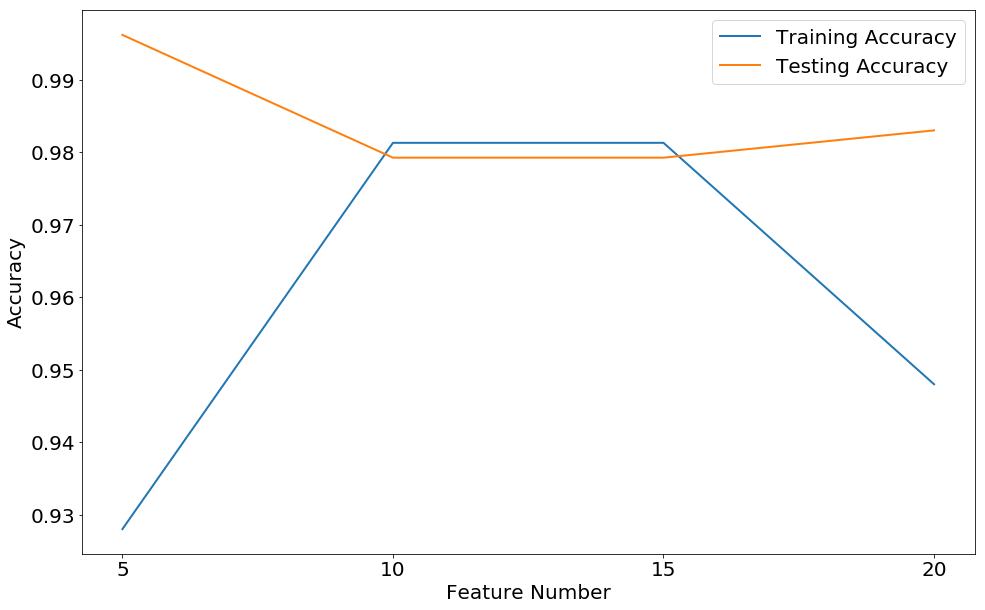

In [44]:
feature_num_list = [5, 10, 15, 20]
training_acc_list = []
testing_acc_list = []
for featrue_num in feature_num_list:
    temp_rf = build_rf(mush_train_X,mush_train_Y,mush_test_X,mush_test_Y,num_feature = featrue_num)
    training_acc_list.append(temp_rf[1])
    testing_acc_list.append(temp_rf[2])
plt.figure(figsize=(16,10))
plt.plot(training_acc_list, marker='', linewidth = 2 , label = 'Training Accuracy')
plt.plot(testing_acc_list, marker='', linewidth = 2, label = 'Testing Accuracy')
plt.legend(fontsize=20)
plt.xlabel('Feature Number', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks([0,1,2,3], feature_num_list, fontsize=20)
plt.show()

In [45]:
training_acc_list

[0.928, 0.9813333333333333, 0.9813333333333333, 0.948]

In [46]:
testing_acc_list

[0.9962335216572504,
 0.9792843691148776,
 0.9792843691148776,
 0.9830508474576272]

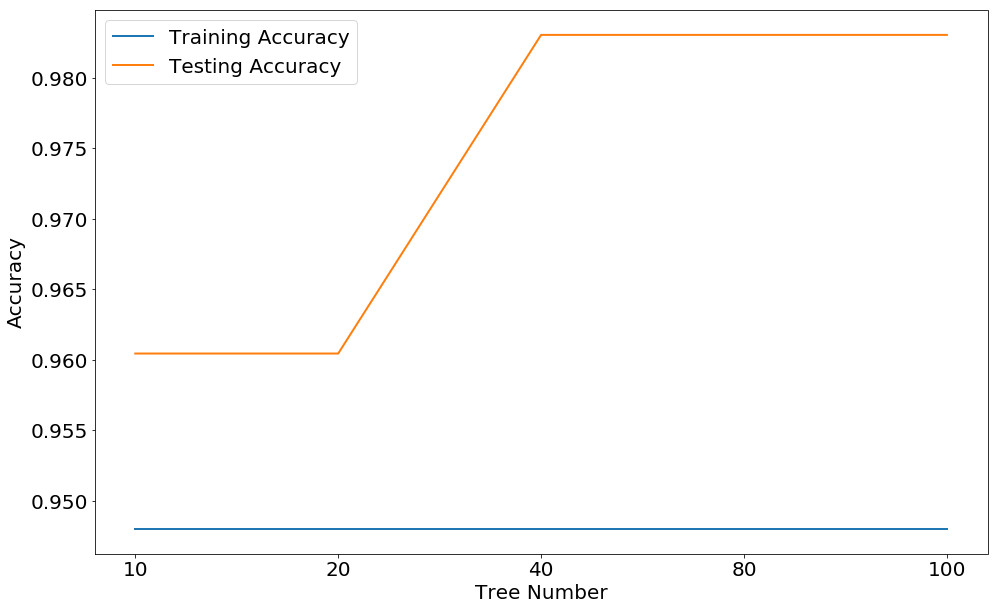

In [52]:
num_tree_list = [10, 20, 40, 80, 100]
training_acc_list = []
testing_acc_list = []
for num_tree in num_tree_list:
    temp_rf = build_rf(mush_train_X,mush_train_Y,mush_test_X,mush_test_Y,num_tree = num_tree, num_feature = 20)
    training_acc_list.append(temp_rf[1])
    testing_acc_list.append(temp_rf[2])
plt.figure(figsize=(16,10))
plt.plot(training_acc_list, marker='', linewidth = 2 , label = 'Training Accuracy')
plt.plot(testing_acc_list, marker='', linewidth = 2, label = 'Testing Accuracy')
plt.legend(fontsize=20)
plt.xlabel('Tree Number', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks([0,1,2,3,4], num_tree_list, fontsize=20)
plt.show()

In [53]:
training_acc_list

[0.948, 0.948, 0.948, 0.948, 0.948]

In [54]:
testing_acc_list

[0.96045197740113,
 0.96045197740113,
 0.9830508474576272,
 0.9830508474576272,
 0.9830508474576272]